In [25]:
#Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


In [26]:
#import Census data and crime data
census_df = pd.read_csv("califpop_df.csv")
crime_df = pd.read_csv("county_crime_df.csv")
cali_boundaries_df = pd.read_csv("us-county-boundaries - California.csv")
housing_df = pd.read_csv("housing_df.csv")
housing_df.head()

,index,2016 Median Housing,2017 Median Housing,2018 Median Housing,2019 Median Housing,2020 Median Housing
0,Alameda County,605800.0,662100.0,722800.0,785800.0,843500.0
1,Alpine County,356100.0,360600.0,368100.0,391000.0,394300.0
2,Amador County,273900.0,288700.0,302600.0,324500.0,339400.0
3,Butte County,242200.0,255400.0,270100.0,294100.0,328400.0
4,Calaveras County,266900.0,281100.0,308800.0,333200.0,346300.0


In [27]:
#pull boundaries table and create a dataframe with only 3 of the needed columns
coordinates_df = cali_boundaries_df[['NAMELSAD','INTPTLAT','INTPTLON']]

#merge latitude and longitude of california counties with the crime table
crime_df = crime_df.merge(coordinates_df,how="left",left_on="County",right_on="NAMELSAD")
crime_df = crime_df.drop(columns=["NAMELSAD","Unnamed: 0"]).rename(columns={"INTPTLAT": "Latitude", "INTPTLON": "Longitude"})

crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442


In [28]:
#remove commas from population data and convert string to float
census_df[['Population 2016','Population 2017',
           'Population 2018','Population 2019','Population 2020']] = census_df[['Population 2016','Population 2017',
           'Population 2018','Population 2019','Population 2020']] .replace(',', '', regex=True).astype(float)
census_df.head()

,Unnamed: 0,COUNTY,County,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020
0,191,1,Alameda County,1650765.0,1659824.0,1666596.0,1668412.0,1662323.0
1,192,3,Alpine County,1053.0,1116.0,1081.0,1113.0,1119.0
2,193,5,Amador County,37443.0,38549.0,39349.0,39693.0,40083.0
3,194,7,Butte County,226222.0,228700.0,230330.0,218726.0,212744.0
4,195,9,Calaveras County,45307.0,45658.0,45747.0,46119.0,46308.0


In [29]:
#merge population table to crime table
crime_df = crime_df.merge(census_df,how="left",on="County")
crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Unnamed: 0,COUNTY,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,191,1,1650765.0,1659824.0,1666596.0,1668412.0,1662323.0
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,192,3,1053.0,1116.0,1081.0,1113.0,1119.0
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,193,5,37443.0,38549.0,39349.0,39693.0,40083.0
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,194,7,226222.0,228700.0,230330.0,218726.0,212744.0
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,195,9,45307.0,45658.0,45747.0,46119.0,46308.0


In [30]:
#Determine crime per capita for each year
crime_df['2016 Crime per Capita (%)'] = crime_df['2016']/crime_df['Population 2016']*100
crime_df['2017 Crime per Capita (%)'] = crime_df['2017']/crime_df['Population 2017']*100
crime_df['2018 Crime per Capita (%)'] = crime_df['2018']/crime_df['Population 2018']*100
crime_df['2019 Crime per Capita (%)'] = crime_df['2019']/crime_df['Population 2019']*100
crime_df['2020 Crime per Capita (%)'] = crime_df['2020']/crime_df['Population 2020']*100

crime_df = crime_df.drop(columns={"Unnamed: 0","COUNTY"})
crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020,2016 Crime per Capita (%),2017 Crime per Capita (%),2018 Crime per Capita (%),2019 Crime per Capita (%),2020 Crime per Capita (%)
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,1650765.0,1659824.0,1666596.0,1668412.0,1662323.0,4.255118,4.471739,4.155056,4.605937,4.116709
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,1053.0,1116.0,1081.0,1113.0,1119.0,3.798670,4.032258,3.792784,4.043127,2.949062
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,37443.0,38549.0,39349.0,39693.0,40083.0,2.043106,1.994864,1.832321,2.002872,1.858643
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,226222.0,228700.0,230330.0,218726.0,212744.0,3.673383,3.662003,3.091217,2.935636,2.606889
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,45307.0,45658.0,45747.0,46119.0,46308.0,1.840775,2.185816,2.310534,2.131443,1.995336


In [31]:
#merge housing data to crime table
crime_df = crime_df.merge(housing_df,how="left",left_on="County",right_on="index").drop(columns={'index'})
crime_df['County'] = crime_df['County'].replace(' County', '', regex=True)
crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,...,2016 Crime per Capita (%),2017 Crime per Capita (%),2018 Crime per Capita (%),2019 Crime per Capita (%),2020 Crime per Capita (%),2016 Median Housing,2017 Median Housing,2018 Median Housing,2019 Median Housing,2020 Median Housing
0,Alameda,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,1650765.0,1659824.0,...,4.255118,4.471739,4.155056,4.605937,4.116709,605800.0,662100.0,722800.0,785800.0,843500.0
1,Alpine,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,1053.0,1116.0,...,3.798670,4.032258,3.792784,4.043127,2.949062,356100.0,360600.0,368100.0,391000.0,394300.0
2,Amador,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,37443.0,38549.0,...,2.043106,1.994864,1.832321,2.002872,1.858643,273900.0,288700.0,302600.0,324500.0,339400.0
3,Butte,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,226222.0,228700.0,...,3.673383,3.662003,3.091217,2.935636,2.606889,242200.0,255400.0,270100.0,294100.0,328400.0
4,Calaveras,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,45307.0,45658.0,...,1.840775,2.185816,2.310534,2.131443,1.995336,266900.0,281100.0,308800.0,333200.0,346300.0


In [32]:
#add average for crime per capita and average median housing
crime_df["Average Crime per Capita (%) 2016-2020"] = (crime_df["2016 Crime per Capita (%)"] + 
                                            crime_df["2017 Crime per Capita (%)"] +
                                            crime_df["2018 Crime per Capita (%)"] +
                                            crime_df["2019 Crime per Capita (%)"] +
                                            crime_df["2020 Crime per Capita (%)"]) / 5
crime_df["Average Median Housing ($) 2016-2020"] = (crime_df["2016 Median Housing"] + 
                                            crime_df["2017 Median Housing"] +
                                            crime_df["2018 Median Housing"] +
                                            crime_df["2019 Median Housing"] +
                                            crime_df["2020 Median Housing"]) / 5

#print dataframe into csv file
crime_df.to_csv('crime_per_capita_housing_df.csv')

crime_df

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,...,2018 Crime per Capita (%),2019 Crime per Capita (%),2020 Crime per Capita (%),2016 Median Housing,2017 Median Housing,2018 Median Housing,2019 Median Housing,2020 Median Housing,Average Crime per Capita (%) 2016-2020,Average Median Housing ($) 2016-2020
0,Alameda,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,1650765.0,1659824.0,...,4.155056,4.605937,4.116709,605800.0,662100.0,722800.0,785800.0,843500.0,4.320912,724000.0
1,Alpine,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,1053.0,1116.0,...,3.792784,4.043127,2.949062,356100.0,360600.0,368100.0,391000.0,394300.0,3.723180,374020.0
2,Amador,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,37443.0,38549.0,...,1.832321,2.002872,1.858643,273900.0,288700.0,302600.0,324500.0,339400.0,1.946361,305820.0
3,Butte,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,226222.0,228700.0,...,3.091217,2.935636,2.606889,242200.0,255400.0,270100.0,294100.0,328400.0,3.193826,278040.0
4,Calaveras,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,45307.0,45658.0,...,2.310534,2.131443,1.995336,266900.0,281100.0,308800.0,333200.0,346300.0,2.092781,307260.0
5,Colusa,403.0,421.0,426.0,410.0,396.0,39.177738,-122.237563,21476.0,21558.0,...,1.991678,1.909286,1.836905,197200.0,215300.0,247800.0,266300.0,263700.0,1.913451,238060.0
6,Contra Costa,33033.0,33797.0,31644.0,32901.0,27854.0,37.919479,-121.951543,1137259.0,1145623.0,...,2.749644,2.853802,2.417183,485000.0,543400.0,602000.0,642000.0,671500.0,2.775068,588780.0
7,Del Norte,783.0,862.0,741.0,931.0,862.0,41.763958,-124.003614,27415.0,27383.0,...,2.666139,3.336559,3.082094,223700.0,219200.0,223800.0,245900.0,249100.0,3.017766,232340.0
8,El Dorado,3439.0,3233.0,3353.0,2886.0,2945.0,38.785612,-120.534224,186027.0,188793.0,...,1.756187,1.494895,1.526500,394500.0,426700.0,453400.0,476300.0,495300.0,1.667739,449240.0
9,Fresno,38239.0,36623.0,33648.0,28206.0,31052.0,36.761006,-119.655019,976231.0,984726.0,...,3.394338,2.826686,3.102352,213400.0,230500.0,245600.0,262900.0,277700.0,3.391897,246020.0


In [33]:
#sort crime data by the crime per capita
crime_df.sort_values(by=['Average Crime per Capita (%) 2016-2020'], ascending=False, inplace = True)
crime_df.reset_index(inplace = True)

#set conditions and values for group column
conditions = [(crime_df.index.values <= 12),
            (crime_df.index.values <= 24),
            (crime_df.index.values <= 36),
            (crime_df.index.values <= 48),
            (crime_df.index.values > 48)]

value = [1, 2, 3, 4, 5]
crime_df['Group'] = np.select(conditions, value)
crime_df

,index,County,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,...,2019 Crime per Capita (%),2020 Crime per Capita (%),2016 Median Housing,2017 Median Housing,2018 Median Housing,2019 Median Housing,2020 Median Housing,Average Crime per Capita (%) 2016-2020,Average Median Housing ($) 2016-2020,Group
0,37,San Francisco,54962.0,61966.0,56934.0,56381.0,44706.0,37.727239,-123.032229,871343.0,...,6.415491,5.158746,866600.0,943700.0,1029300.0,1118200.0,1185700.0,6.283202,1028700.0,1
1,0,Alameda,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,1650765.0,...,4.605937,4.116709,605800.0,662100.0,722800.0,785800.0,843500.0,4.320912,724000.0,1
2,14,Kern,38393.0,34614.0,36272.0,36014.0,35114.0,35.346629,-118.729506,881094.0,...,4.006461,3.895660,188100.0,203600.0,217400.0,226100.0,239800.0,4.043906,215000.0,1
3,1,Alpine,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,1053.0,...,4.043127,2.949062,356100.0,360600.0,368100.0,391000.0,394300.0,3.723180,374020.0,1
4,38,San Joaquin,28766.0,28012.0,28332.0,27564.0,23597.0,37.934981,-121.272244,732662.0,...,3.619361,3.072658,258700.0,294000.0,329400.0,358000.0,383400.0,3.630304,324700.0,1
5,9,Fresno,38239.0,36623.0,33648.0,28206.0,31052.0,36.761006,-119.655019,976231.0,...,2.826686,3.102352,213400.0,230500.0,245600.0,262900.0,277700.0,3.391897,246020.0,1
6,11,Humboldt,4719.0,4907.0,4595.0,4623.0,4172.0,40.706655,-123.926176,136477.0,...,3.403294,3.090897,288500.0,295100.0,311100.0,326000.0,340800.0,3.381503,312300.0,1
7,49,Stanislaus,21395.0,20216.0,18610.0,17351.0,13870.0,37.562316,-121.002831,538986.0,...,3.156099,2.521447,222700.0,251600.0,279800.0,298600.0,322400.0,3.351345,275020.0,1
8,43,Santa Cruz,10624.0,10072.0,8603.0,8165.0,7200.0,37.012488,-122.007205,274476.0,...,2.992267,2.667408,622900.0,670000.0,727200.0,778300.0,808100.0,3.267548,721300.0,1
9,3,Butte,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,226222.0,...,2.935636,2.606889,242200.0,255400.0,270100.0,294100.0,328400.0,3.193826,278040.0,1


In [35]:
#remove misc column
crime_df = crime_df.drop(columns={"index"})

#group data by groups and average the values
group_crime_df = crime_df.groupby(["Group"]).mean()

group_crime_df

,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,Population 2018,...,2018 Crime per Capita (%),2019 Crime per Capita (%),2020 Crime per Capita (%),2016 Median Housing,2017 Median Housing,2018 Median Housing,2019 Median Housing,2020 Median Housing,Average Crime per Capita (%) 2016-2020,Average Median Housing ($) 2016-2020
Group,,,,,,,,,,,,,,,,,,,,,
1,23518.923077,23775.153846,22482.307692,22196.461538,19932.923077,38.092980,-121.357225,5.518542e+05,5.563309e+05,5.594299e+05,...,3.723415,3.554585,3.183849,352738.461538,381692.307692,413376.923077,444784.615385,471084.615385,3.691771,412735.384615
2,45580.916667,44906.500000,43398.333333,41879.416667,39206.666667,37.807146,-120.422874,1.484290e+06,1.491104e+06,1.494050e+06,...,2.845635,2.860345,2.677237,288300.000000,311633.333333,338183.333333,361425.000000,381083.333333,2.911103,336125.000000
3,8334.916667,8378.250000,8187.916667,7996.666667,7453.666667,37.531928,-120.340887,3.107548e+05,3.117188e+05,3.121470e+05,...,2.530547,2.327516,2.191185,294908.333333,317225.000000,336750.000000,359833.333333,382833.333333,2.486702,338310.000000
4,17210.166667,16744.916667,16017.250000,15672.833333,15557.083333,37.400785,-120.756642,7.627190e+05,7.649416e+05,7.660522e+05,...,2.033713,1.981151,2.026283,459083.333333,488666.666667,522125.000000,552775.000000,581025.000000,2.092958,520735.000000
5,2732.111111,2726.555556,2541.666667,2391.888889,2339.666667,38.502502,-120.843088,1.424348e+05,1.435906e+05,1.442088e+05,...,1.556948,1.524047,1.427936,337055.555556,365066.666667,386333.333333,410866.666667,438400.000000,1.604172,387544.444444


In [36]:
#reset index 
group_crime_df.reset_index(inplace=True)
group_crime_df

,Group,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,...,2018 Crime per Capita (%),2019 Crime per Capita (%),2020 Crime per Capita (%),2016 Median Housing,2017 Median Housing,2018 Median Housing,2019 Median Housing,2020 Median Housing,Average Crime per Capita (%) 2016-2020,Average Median Housing ($) 2016-2020
0,1,23518.923077,23775.153846,22482.307692,22196.461538,19932.923077,38.092980,-121.357225,5.518542e+05,5.563309e+05,...,3.723415,3.554585,3.183849,352738.461538,381692.307692,413376.923077,444784.615385,471084.615385,3.691771,412735.384615
1,2,45580.916667,44906.500000,43398.333333,41879.416667,39206.666667,37.807146,-120.422874,1.484290e+06,1.491104e+06,...,2.845635,2.860345,2.677237,288300.000000,311633.333333,338183.333333,361425.000000,381083.333333,2.911103,336125.000000
2,3,8334.916667,8378.250000,8187.916667,7996.666667,7453.666667,37.531928,-120.340887,3.107548e+05,3.117188e+05,...,2.530547,2.327516,2.191185,294908.333333,317225.000000,336750.000000,359833.333333,382833.333333,2.486702,338310.000000
3,4,17210.166667,16744.916667,16017.250000,15672.833333,15557.083333,37.400785,-120.756642,7.627190e+05,7.649416e+05,...,2.033713,1.981151,2.026283,459083.333333,488666.666667,522125.000000,552775.000000,581025.000000,2.092958,520735.000000
4,5,2732.111111,2726.555556,2541.666667,2391.888889,2339.666667,38.502502,-120.843088,1.424348e+05,1.435906e+05,...,1.556948,1.524047,1.427936,337055.555556,365066.666667,386333.333333,410866.666667,438400.000000,1.604172,387544.444444


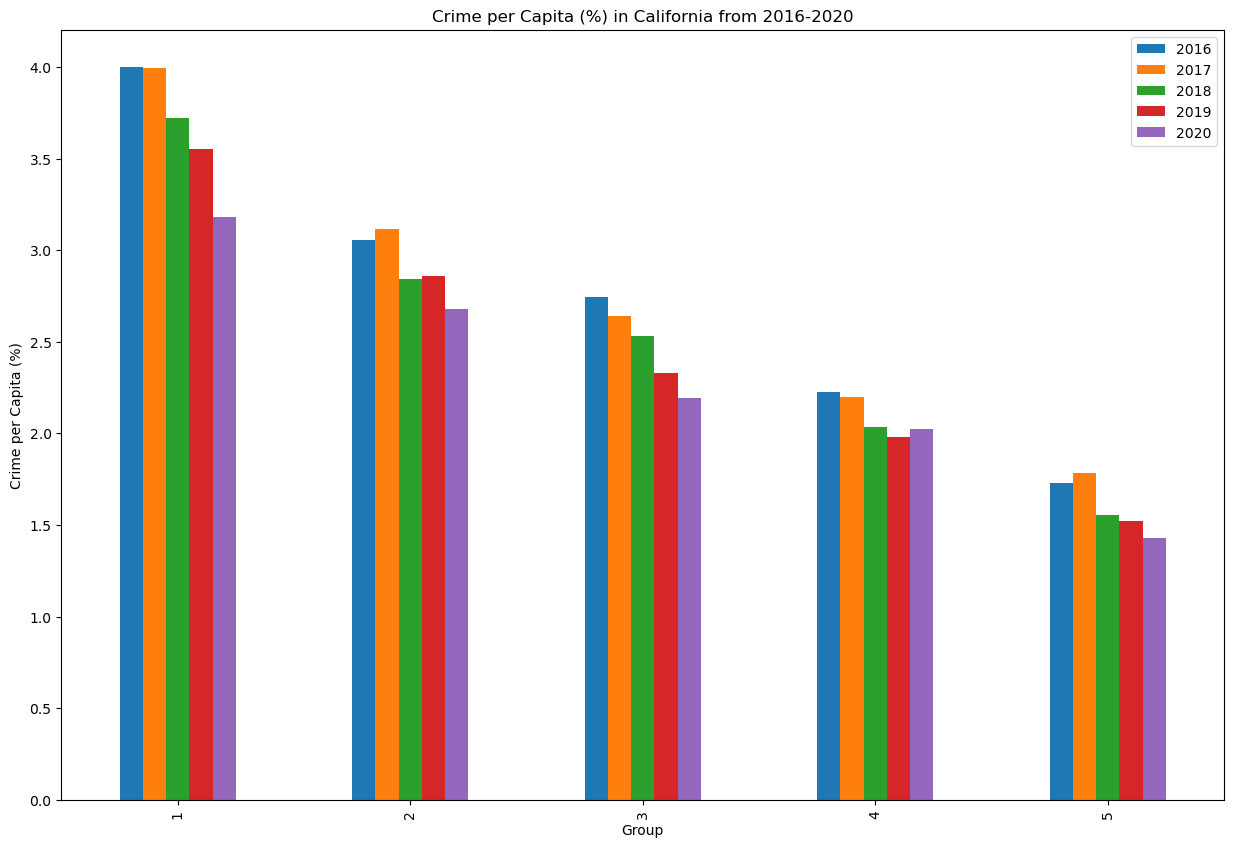

In [56]:
#create line graph based on crime per capita by groups
group_crime_df.plot(kind="bar",x='Group',
              y=['2016 Crime per Capita (%)','2017 Crime per Capita (%)','2018 Crime per Capita (%)','2019 Crime per Capita (%)','2020 Crime per Capita (%)'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(15,10))
plt.title("Crime per Capita (%) in California from 2016-2020")
plt.ylabel("Crime per Capita (%)")
plt.xticks(group_crime_df.index,group_crime_df['Group'])
plt.savefig("Crime per Capita (%) in CA from 2016-2020")

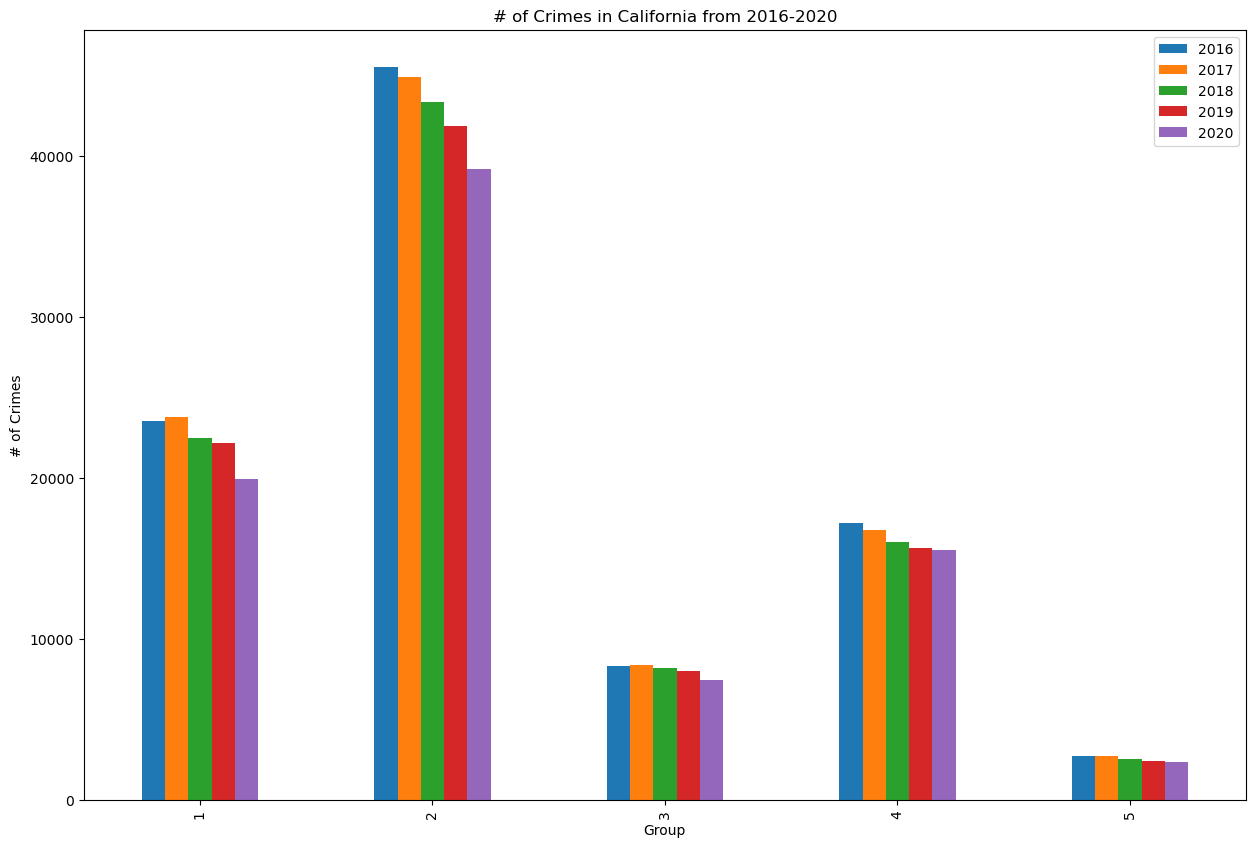

In [54]:
#create bar graph based on # of crime by groups
group_crime_df.plot(kind="bar",x='Group',
              y=['2016','2017','2018','2019','2020'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(15,10))
plt.title("# of Crimes in California from 2016-2020")
plt.ylabel("# of Crimes")
plt.xticks(group_crime_df.index,group_crime_df['Group'])
plt.savefig("# of Crimes in California from 2016-2020.png")

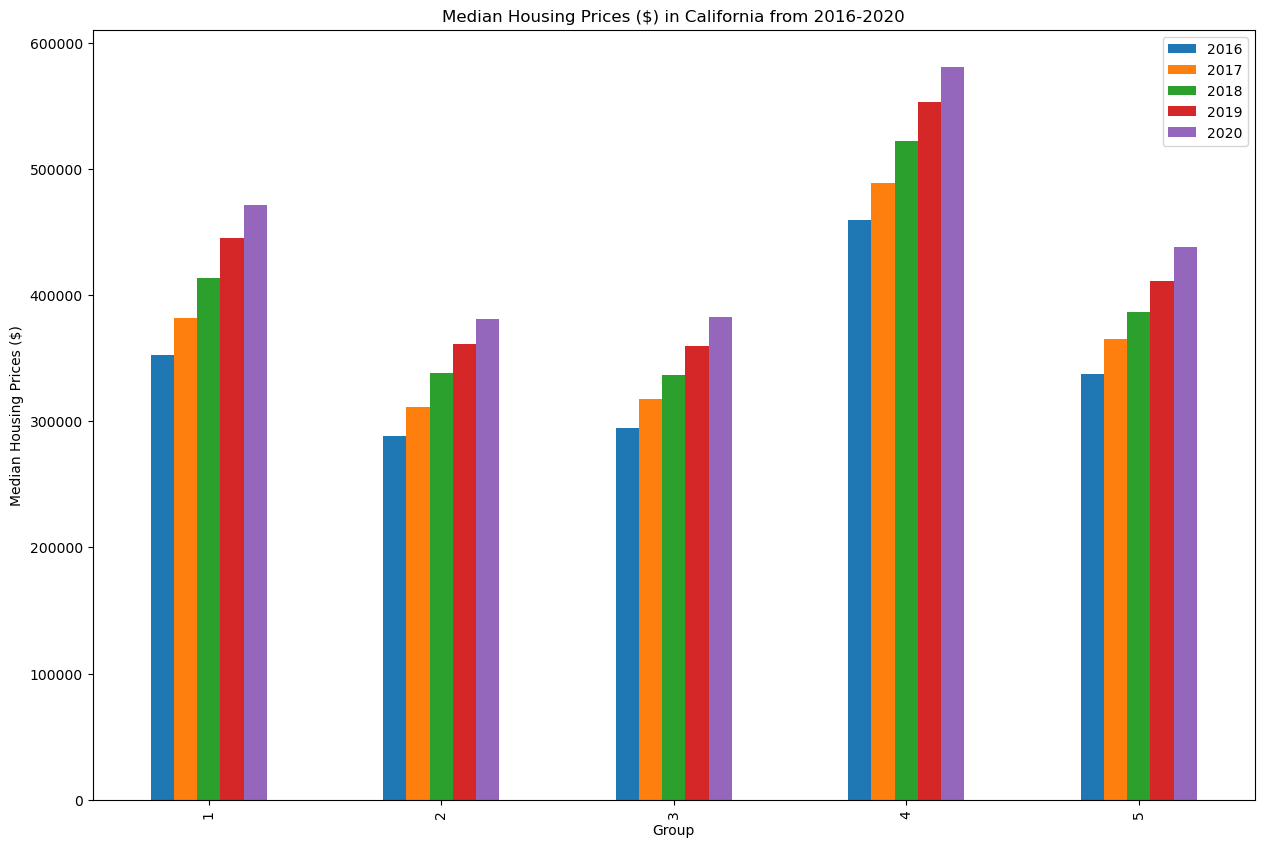

In [52]:
#create bar graph based on median housing price by group
group_crime_df.plot(kind="bar",x='Group',
              y=['2016 Median Housing','2017 Median Housing','2018 Median Housing','2019 Median Housing','2020 Median Housing'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(15,10))
plt.title("Median Housing Prices ($) in California from 2016-2020")
plt.ylabel("Median Housing Prices ($)")
plt.xticks(group_crime_df.index,group_crime_df['Group'])
plt.savefig("Median Housing Prices in California from 2016-2020.png")

In [47]:
#unpivot the county data into a column
column_names = crime_df.columns.values.tolist()
#column_names = column_names.remove('County')
#crime_df_unpivot = pd.melt(crime_df, id_vars='col1', value_vars=column_names)
print(column_names)

['County', '2016', '2017', '2018', '2019', '2020', 'Latitude', 'Longitude', 'Population 2016', 'Population 2017', 'Population 2018', 'Population 2019', 'Population 2020', '2016 Crime per Capita (%)', '2017 Crime per Capita (%)', '2018 Crime per Capita (%)', '2019 Crime per Capita (%)', '2020 Crime per Capita (%)', '2016 Median Housing', '2017 Median Housing', '2018 Median Housing', '2019 Median Housing', '2020 Median Housing', 'Average Crime per Capita (%) 2016-2020', 'Average Median Housing ($) 2016-2020', 'Group']


In [ ]:
#filter for number of crimes
crime_count_df = crime_df_transposed[(crime_df_transposed["index"]=="2016") | 
                                     (crime_df_transposed["index"]=="2017") | 
                                     (crime_df_transposed["index"]=="2018") | 
                                     (crime_df_transposed["index"]=="2019") |
                                     (crime_df_transposed["index"]=="2020")]
crime_count_df

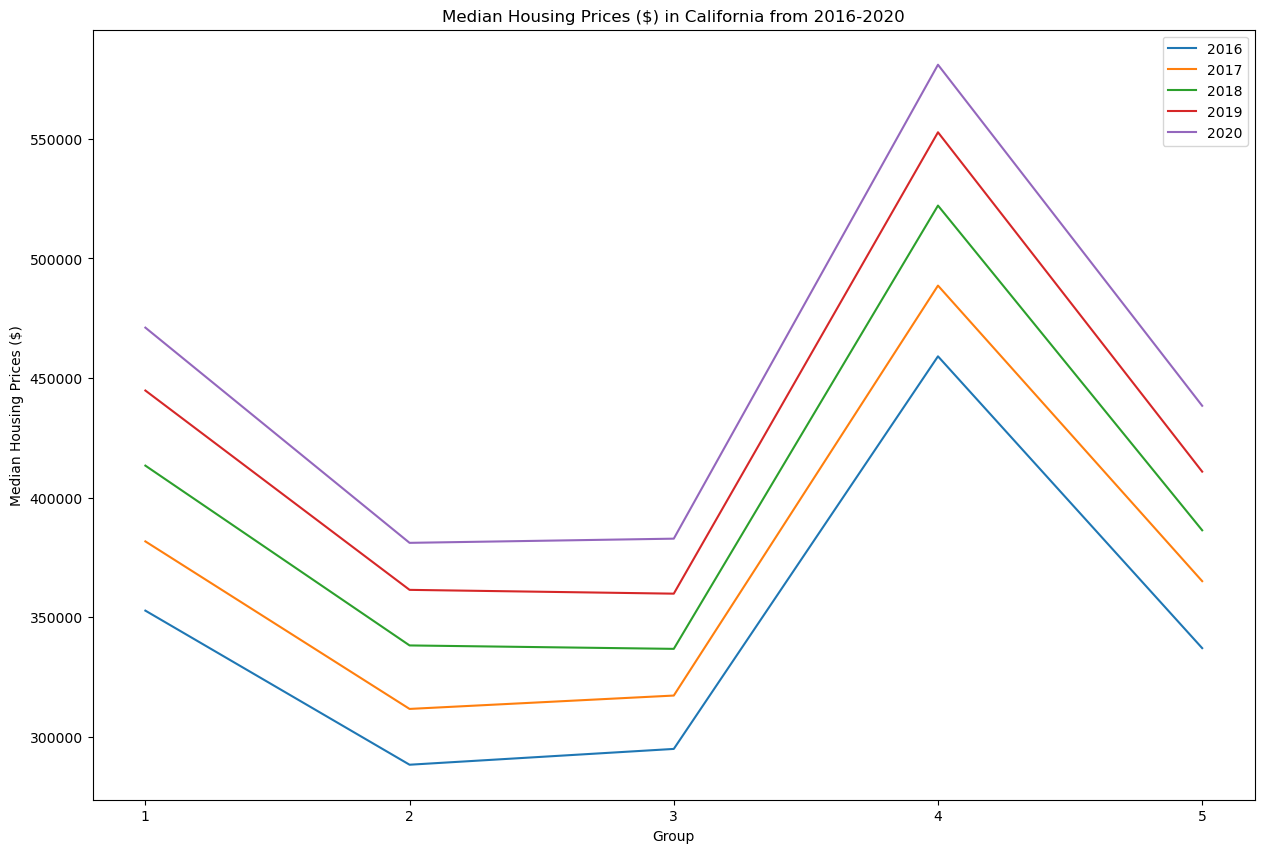

In [51]:
#create line graph based on median housing price by group
group_crime_df.plot(kind="line",x='Group',
              y=['2016 Median Housing','2017 Median Housing','2018 Median Housing','2019 Median Housing','2020 Median Housing'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(15,10))
plt.title("Median Housing Prices ($) in California from 2016-2020")
plt.ylabel("Median Housing Prices ($)")
plt.xticks(group_crime_df.index+1,group_crime_df['Group'])
plt.savefig("Median Housing Prices in California from 2016-2020 (Line Graph).png")

In [57]:
crime_df.sort_values(by=['Average Median Housing ($) 2016-2020'], ascending=False, inplace = True)
crime_df

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,...,2019 Crime per Capita (%),2020 Crime per Capita (%),2016 Median Housing,2017 Median Housing,2018 Median Housing,2019 Median Housing,2020 Median Housing,Average Crime per Capita (%) 2016-2020,Average Median Housing ($) 2016-2020,Group
0,San Francisco,54962.0,61966.0,56934.0,56381.0,44706.0,37.727239,-123.032229,871343.0,877471.0,...,6.415491,5.158746,866600.0,943700.0,1029300.0,1118200.0,1185700.0,6.283202,1028700.0,1
38,San Mateo,16605.0,17162.0,16308.0,18179.0,17461.0,37.414673,-122.371546,767928.0,768658.0,...,2.376930,2.302626,854500.0,930200.0,1014500.0,1114700.0,1189100.0,2.239379,1020600.0,4
40,Marin,5473.0,5496.0,5252.0,5977.0,5947.0,38.051817,-122.745974,260722.0,259975.0,...,2.306965,2.311022,875000.0,920500.0,975500.0,1014300.0,1075900.0,2.170100,972240.0,4
27,Santa Clara,48468.0,51215.0,51769.0,54220.0,50220.0,37.220695,-121.690510,1928144.0,1932251.0,...,2.820417,2.633311,755700.0,834700.0,917600.0,987500.0,1070600.0,2.659510,913220.0,3
1,Alameda,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,1650765.0,1659824.0,...,4.605937,4.116709,605800.0,662100.0,722800.0,785800.0,843500.0,4.320912,724000.0,1
8,Santa Cruz,10624.0,10072.0,8603.0,8165.0,7200.0,37.012488,-122.007205,274476.0,274865.0,...,2.992267,2.667408,622900.0,670000.0,727200.0,778300.0,808100.0,3.267548,721300.0,1
39,Orange,73598.0,73593.0,69252.0,66246.0,68755.0,33.675687,-117.777207,3164277.0,3174159.0,...,2.089218,2.171080,599700.0,635800.0,668900.0,694200.0,719500.0,2.217094,663620.0,4
42,Napa,3133.0,2828.0,2748.0,2965.0,2859.0,38.507100,-122.325904,140778.0,139818.0,...,2.153576,2.102747,527600.0,578300.0,621400.0,654700.0,680900.0,2.097368,612580.0,4
23,Contra Costa,33033.0,33797.0,31644.0,32901.0,27854.0,37.919479,-121.951543,1137259.0,1145623.0,...,2.853802,2.417183,485000.0,543400.0,602000.0,642000.0,671500.0,2.775068,588780.0,2
50,Sonoma,9716.0,9675.0,9204.0,8848.0,8698.0,38.525182,-122.926109,502445.0,502203.0,...,1.797212,1.775758,470200.0,523200.0,578300.0,617900.0,647600.0,1.856863,567440.0,5
